In [67]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import colors

## Func

In [68]:
def _AffineMatrix(src, dst):
    src_ = np.vstack([src.T, np.array([1,1,1])])
    dst_ = np.vstack([dst.T, np.array([1,1,1])])
    M_ = np.dot(np.dot(dst_, src_.T), np.linalg.inv(np.dot(src_, src_.T)))
    return M_

def _Warp(img, M_, WH):
    W, H = WH[0], WH[1]
    src_y, src_x = np.indices(img.shape[:2])
    src_pts = np.stack((src_x.ravel(), src_y.ravel(), np.ones(src_y.size))).astype(int)
    dst_pts = np.round(np.dot(M_, src_pts)).astype(int)

    dst_img = np.zeros([W, H, 3])
    for c in range(3):
        for i in range(dst_pts.shape[-1]):
            dst_x, dst_y = dst_pts[0, i], dst_pts[1, i]
            src_u, src_v = src_pts[0, i], src_pts[1, i]
            if 0<=dst_x<H and 0<=dst_y<W:
                dst_img[dst_y, dst_x, c] = img[src_v, src_u, c]
    dst_img = dst_img.astype(int)  
    return dst_img  



## img

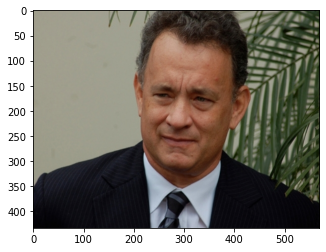

In [69]:
img_P = "./img/TomHanksApr09.jpg"
# img_P = "./img/tom-cruise-vanessa-kirby-mission-impossible-fallout-1564649325.bmp"
img_org = cv2.imread(img_P)    # bgr
img = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.imshow(img)

## src

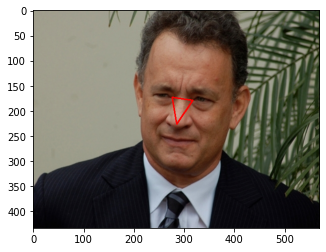

In [89]:
img_c = np.copy(img)
src = np.array([[276, 173], [317, 179], [285, 226]], np.float32)  # eye_L, eye_R, nose
cv2.polylines(img_c, [src.astype(int)], True, (255, 0, 0), 2)

fig = plt.figure()
plt.imshow(img_c)

## dst

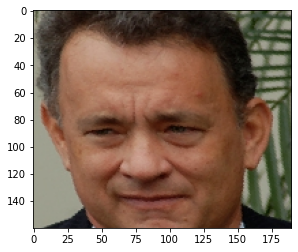

In [71]:
dst = np.array([[65, 90], [95, 90], [80, 120]],  np.float32)
M = _AffineMatrix(src, dst)
res = _Warp(img, M, (160, 190))

fig = plt.figure()
plt.imshow(res)         


## Inv

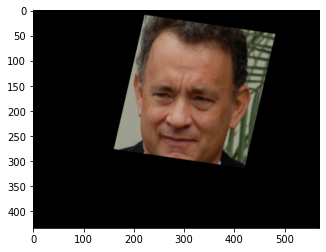

In [98]:
M_inv = _AffineMatrix(dst, src)
W_org, H_org, _ = img.shape
MM = M_inv[:-1,:]
inv = cv2.warpAffine(res.astype(np.uint8), MM, (H_org, W_org))

fig = plt.figure()
plt.imshow(inv)